In [129]:
import re
import os
import cv2
import time
import codecs
import random
import shutil
import requests
import configparser
from pathlib import Path
from chardet import detect
from selenium import webdriver
from matplotlib import pyplot as plt
# from urllib.parse import unquote, urlparse
from bs4 import BeautifulSoup as BS
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select

In [2]:
def _load_config():
    config_path = "./config.ini"
    with open(config_path, "rb") as ef:
        config_encoding = detect(ef.read())["encoding"]
    config = configparser.ConfigParser()
    config.read_file(codecs.open(config_path, "r", config_encoding))
    return config

In [3]:
def _requests_retry_session(config, status_forcelist=(500, 502, 504), session=None):
    session = requests.session()
    headers = {"user-agent": config["Requests_header"]["user-agent"]}
    session.headers.update(headers)
    return session

In [244]:
def mkdirs(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [4]:
config = _load_config()

In [5]:
home_path = str(Path.home()).replace("\\", "/")

In [242]:
Path().absolute()

WindowsPath('D:/python/tpech')

In [268]:
dir_cache = "./cache"
mkdirs(dir_cache)

In [271]:
def selenium_setting():
    # Selenium setting
    chrome_opt = Options()
#     chrome_opt.headless = True
    chrome_opt.add_argument("--disable-gpu")
    chrome_opt.add_argument("--mute-audio")
    chrome_opt.add_argument("--ignore-gpu-blocklist")
    chrome_opt.add_argument("--no-default-browser-check")
    chrome_opt.add_argument("--disable-default-apps")
    chrome_opt.add_argument("--disable-extensions")
    chrome_opt.add_argument("--hide-scrollbars")
    chrome_opt.add_argument("disk-cache-dir={}/{}".format(Path().absolute(), dir_cache))
    chrome_opt.add_experimental_option("excludeSwitches", ["enable-logging"])
    chrome_opt.binary_location = config["Chrome_Canary"]["CHROME_PATH"].format(home_path)
    return chrome_opt

In [272]:
chrome_opt = selenium_setting()

In [281]:
driver.quit()

In [274]:
url = "https://webreg.tpech.gov.tw/RegOnline1_2.aspx?ZCode=P&DeptCode=0100&deptname=\
    %e5%ae%b6%e5%ba%ad%e9%86%ab%e5%ad%b8%e7%a7%91"

In [275]:
driver = webdriver.Chrome(
            executable_path=config["Chrome_Canary"]["CHROMEDRIVER_PATH"],
            options=chrome_opt
        )

In [276]:
driver.get(url)

In [277]:
soup = BS(driver.page_source, "lxml")

In [278]:
doc_name = soup.find_all("input", {"name":"RadioDoctor"})[0].parent.a.text

In [279]:
driver.find_element_by_link_text(doc_name).click()

In [180]:
driver.find_element_by_name("no").send_keys("")

In [181]:
# Select(driver.find_element_by_name("yeartype")).select_by_value("民國")

In [182]:
Select(driver.find_element_by_name("y1")).select_by_value("")

In [183]:
Select(driver.find_element_by_name("m1")).select_by_value("")

In [184]:
Select(driver.find_element_by_name("d1")).select_by_value("")

In [185]:
driver.find_element_by_id("rbAgree").click()

In [186]:
driver.find_element_by_name("txtCellPhone").send_keys("")

In [187]:
# driver.find_element_by_name("Button1").click()

In [233]:
width  = driver.execute_script("return Math.max(document.body.scrollWidth, document.body.offsetWidth, document.documentElement.clientWidth, document.documentElement.scrollWidth, document.documentElement.offsetWidth);")
height = driver.execute_script("return Math.max(document.body.scrollHeight, document.body.offsetHeight, document.documentElement.clientHeight, document.documentElement.scrollHeight, document.documentElement.offsetHeight);")
driver.set_window_size(width, height)

In [263]:
driver.save_screenshot("screenshot.png")

True

In [280]:
verify = driver.find_element_by_xpath("//img[@src='ValidateCode.aspx']")

In [260]:
location = verify.location
size = verify.size

In [261]:
left = location["x"]
top = location["y"]
right = location["x"] + size["width"]
bottom = location["y"] + size["height"]

In [262]:
left, right, top, bottom

(316, 384, 721, 747)

In [264]:
im = cv2.imread("screenshot.png")

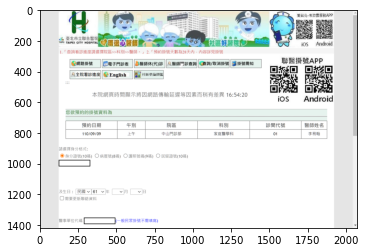

In [265]:
plt.imshow(im)

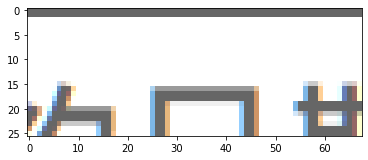

In [266]:
plt.imshow(im[top:bottom, left:right])

In [128]:
cv2.imwrite("./crop.png", )

True